In [321]:
from manipulate_data_class import Data
from card_generator_class import Cards
import pandas as pd
import random

In [322]:
FILEPATH = "gtp_samples.json"
read_cards = Data(attribute="r", filepath=FILEPATH)
card_text = read_cards.read_json()
df = pd.DataFrame(card_text)

In [323]:
packs = df.pack.unique()
card_pack = packs[random.randint(0, len(packs) - 1)]
rand_pack_white = df.loc[(df["pack"] == card_pack) & (df["color"] == "white")]
rand_pack_white

,text,pack,pick,color
20,Jollof rice,Ghana CAH,NaN,white
21,Corruption,Ghana CAH,NaN,white
22,Sarcasm,Ghana CAH,NaN,white
23,Religious leaders,Ghana CAH,NaN,white
24,Waakye,Ghana CAH,NaN,white
...,...,...,...,...
201,A crowd of fans at a Ghanaian music concert,Ghana CAH,NaN,white
202,The joyful sound of 'Adowa' drums during a tra...,Ghana CAH,NaN,white
203,Ghanaian fashionistas rocking colorful Kente o...,Ghana CAH,NaN,white
204,The vibrant street art in Accra,Ghana CAH,NaN,white


In [324]:
rand_pack_white.loc[rand_pack_white["text"] == "Jollof rice"]

,text,pack,pick,color
20,Jollof rice,Ghana CAH,NaN,white


In [325]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

In [326]:
color = 'white'

In [327]:
if color == "black":
    text_fill_color = (255, 255, 255)
    logo = "Transparent_logo_black.png"
if color == "white":
    text_fill_color = (0, 0, 0)
    logo = "Transparent_logo_white.png"

In [328]:
height = 800
width = 600


In [329]:
signature = "Cards Against GoldCoast Politics"
font = ImageFont.truetype("helveticaneuebd.ttf", size=65)
signature_font = ImageFont.truetype("helveticaneue.ttf", size=20)
img = Image.new("RGB", (width, height), color=color)

In [330]:
text_position = (40, 40)
signature_position = (100, 750)
text_on_card = ImageDraw.Draw(img)
signature_on_card = ImageDraw.Draw(img)

In [331]:
if color == "white":
    border_color = (0, 0, 0)  # Black border for white cards
if color == "black":
    border_color = (255, 255, 255)  # White border for black cards

border_width = 1
border_rect = [
(border_width, border_width),
(width - border_width, height - border_width),
]
border_draw = ImageDraw.Draw(img)
border_draw.rectangle(
border_rect, outline=border_color, width=border_width)

signature_on_card.text(
    signature_position, signature, font=signature_font, fill=text_fill_color
)

In [332]:
line_width = 40
line_height = 80
message = "Hello There How Are You and the family"

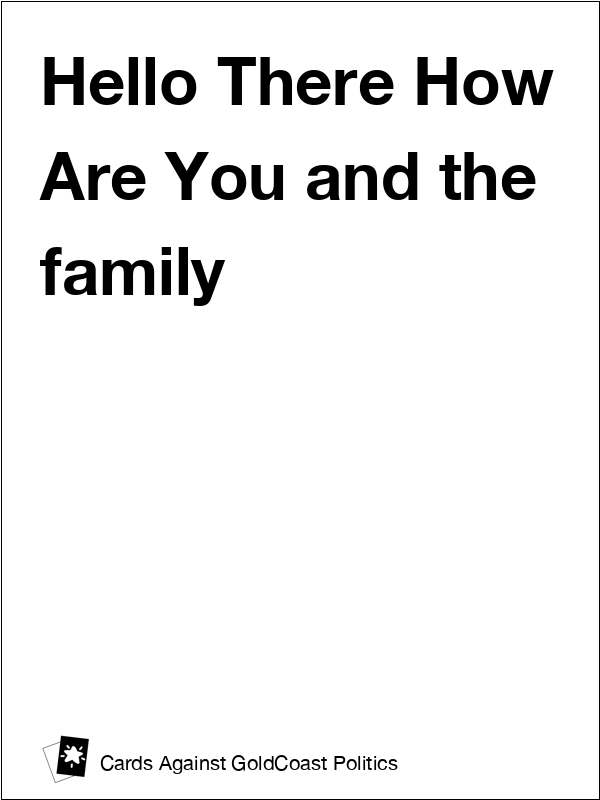

In [333]:
wrapped_text = textwrap.wrap(
    message, width=int((600) / line_width))
wrapped_text_height = len(wrapped_text) * (line_height)

for line in wrapped_text:
    text_on_card.text(text_position, line, font=font,
                        fill=text_fill_color)
    text_position = (
        text_position[0],
        text_position[1] + line_height + 15,
    )  # Move to the next line

# Load the small image to be inserted
small_image = Image.open(logo)
small_image_position = (40, 735)
small_image_size = (50, 50)
small_image = small_image.resize(small_image_size)
img.paste(small_image, small_image_position)
img

In [2]:
from manipulate_data_class import Data
from card_generator_class import Cards
import pandas as pd
import random
import streamlit as st
import io


In [3]:
FILEPATH = "original_cards_dict.json"


read_cards = Data(attribute="r", filepath=FILEPATH)
card_text = read_cards.read_json()
df = pd.DataFrame(card_text)

In [8]:
packs = df.pack.unique()
card_pack = packs[random.randint(0, len(packs) - 1)]
rand_pack_black = df.loc[(df["pack"] == card_pack) & (df["color"] == "black")]
rand_pack_white = df.loc[(df["pack"] == card_pack) & (df["color"] == "white")]

In [33]:
rand_pack_white = rand_pack_white.to_dict('records')

In [132]:
unique_white_cards = random.sample(rand_pack_white, 5)
unique_white_cards

[{'text': 'Slicing a ham in icy silence.',
  'pack': '2013 Holiday Pack',
  'pick': nan,
  'color': 'white'},
 {'text': 'Being blind and deaf and having no limbs.',
  'pack': '2013 Holiday Pack',
  'pick': nan,
  'color': 'white'},
 {'text': "Rudolph's bright red balls.",
  'pack': '2013 Holiday Pack',
  'pick': nan,
  'color': 'white'},
 {'text': 'A magical tablet containing a world of unlimited pornography.',
  'pack': '2013 Holiday Pack',
  'pick': nan,
  'color': 'white'},
 {'text': 'A simultaneous nightmare and wet dream starring Sigourney Weaver.',
  'pack': '2013 Holiday Pack',
  'pick': nan,
  'color': 'white'}]

In [91]:
img_bytes = []
for card in range(0, 5):
    white_card = rand_pack_white.sample()
    white_card_message = str(white_card["text"].squeeze())
    white_card_pack = str(white_card["pack"].squeeze())
    white_card_color = str(white_card["color"].squeeze())
white_card_message

AttributeError: 'list' object has no attribute 'sample'